# Lab 2 - Classification

## Names:
David Samuel
James Hancock
Alexandra Fisher
Remy Lagrois

This notebook will explore 6 different models to classify the MNIST Handwritten.

# Data Description

In [23]:
%matplotlib inline 

In [24]:
 # controls matplotlib within Jupyter

import pandas as pd                    # import pandas lib

print("Importing...")
# create data frame of training and testing sets
train = pd.read_csv('data/train.csv')  
test = pd.read_csv('data/test.csv')
print("Done!...")

Importing...
Done!...


## Check the frequency of the training class labels

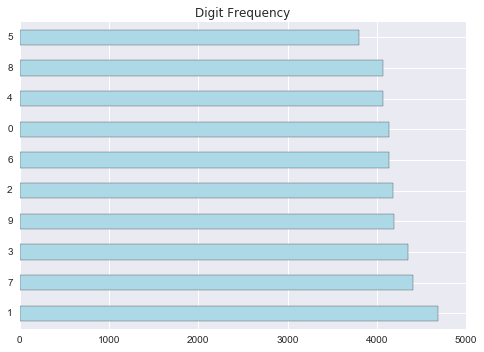

In [25]:
import seaborn as sns       # import the seaborn library for a quick distribution plot
sns.set(color_codes=True)       # Reset color_codes to default

c = train.label.value_counts()  # create a pandas Series of label counts
sns = c.plot(color="lightblue", title="Digit Frequency", kind='barh')  # set seaborn object equal to pandas plot object and it will plot automatically



# Data Preparation
### Split data

In [26]:
import numpy as np
from sklearn.model_selection import train_test_split  # We will try the method train_test_split instead of ShuffleSplit

print("splitting...")
# set X and y equal to label values
y = train.label.values
X = train.values 


# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)    
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)  # create x and y training set
print("Done!")

splitting...
Done!


## Now check the distribution of the split

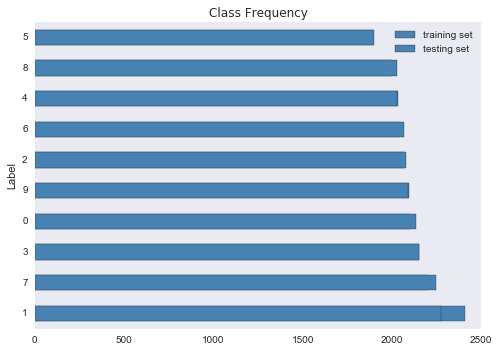

In [27]:
import matplotlib.pyplot as plt  # import pyplot to format plotting
import seaborn as sns; sns.set()            # Import seaborn for fancy formatting, reset formatting

sns.set_style("darkgrid", {'axes.grid' : False})  # Set a dark background with no lines

# loop to plot distribution of split
for i in range(len([y_train, y_test])):  
    s = pd.Series([y_train, y_test][i])  # set series to plot for each data set split
    col = 'steelblue'
    if len(s) > len(y_test):    # If it is training set plot in lightblue
        col = 'lightblue'
    c = s.value_counts()  # create a pandas Series of label counts
    
    ax = sns = c.plot(title="Class Frequency", kind='barh', color=col)  # set ax object equal to seaborn bar plot

ax.set(ylabel='Label')                                      # Label the y-axis
plt.legend(['training set', 'testing set'])                 # Create legend
plt.show()                                                  # plots the pyplot object

## The Plot above shows differences in frequencies of the split in colored sections.  The distribution appears normal, and ready for testing.

### The frequency of the split is normal

# Describe Final Dataset

In [28]:
# Image Data Preprocessing

# Modeling and Evaluation

In [29]:
# Let's try reducing dimensionality with PCA to 50 components 
# as we have seen from the eigenvectors from lab 1, 50 should be sufficient

# http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA.fit_transform

# sklearn.decomposition.PCA(n_components=None, copy=True, whiten=False, 
# svd_solver='auto', tol=0.0, iterated_power='auto', random_state=None)

from scipy import stats, integrate
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
from sklearn.decomposition import PCA

print("Fitting PCA...")
n_comp = 50

# whitening was recommended, as well as arpack solver

pca = PCA(n_components=n_comp, whiten=True, svd_solver='arpack')

# Set fitted PCA object
trainer = pca.fit_transform(X_train)
tester = pca.fit_transform(X_test)

evr = pca.explained_variance_ratio_
print sum(evr), "Percent Variance Explained by", n_comp, 'PCs'

# Create cumulative series to plot
cum = 0
d = []
evr = pca.explained_variance_ratio_

for i in range(50):  
    cum += evr[i]
    d.append(cum)

print("Done!")

Fitting PCA...
0.825821398422 Percent Variance Explained by 50 PCs
Done!


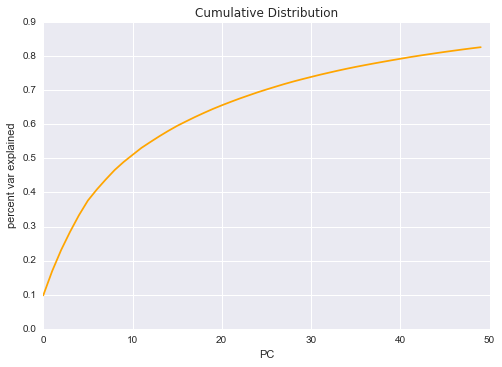

In [30]:

plt.plot(d, color='orange', label=True)
plt.title('Cumulative Distribution')
plt.xlabel('PC')
plt.ylabel('percent var explained')
plt.show()

## We will now try to run PCA on the full training and testing sets

In [31]:
# The function below plots a confusion matrix
#
from datetime import datetime as dt; start = dt.now()
print(__doc__)

import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
# # Create a DF from corr    
# conf = pd.DataFrame(conf)
# corr = conf.corr()

# # Generate a mask for the upper triangle
# mask = np.zeros_like(corr, dtype=np.bool)
# mask[np.triu_indices_from(mask)] = True

# # Set up the matplotlib figure
# f, ax = plt.subplots(figsize=(11, 9))

# # Generate a custom diverging colormap
# cmap = sns.diverging_palette(220, 10, as_cmap=True)

# # Draw the heatmap with the mask and correct aspect ratio
# # heatmap(data, vmin=None, vmax=None, cmap=None, center=None, robust=False, annot=None, fmt='.2g', annot_kws=None, linewidths=0, 
# #         linecolor='white', 
# #         cbar=True, cbar_kws=None, cbar_ax=None, square=False, ax=None, xticklabels=True, yticklabels=True, mask=None, **kwargs)

# ax = sns.heatmap(corr)

Automatically created module for IPython interactive environment


Sag Solver...
Fitting Logit...


C:\Anaconda2\lib\site-packages\sklearn\linear_model\sag.py:286: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


predicting...
Accuracy is 40.080952381 %
8 CPUs Ran in 0:01:23.929000 minutes
Confusion matrix, without normalization
[[1590    3  175   65    6  155   91   36    6    8]
 [   0 1261   76  206    1  282   17    4  423    3]
 [  69    5  492  691   99  115    0  103  422   84]
 [  65   61  372 1193   40   60  105    8  199   50]
 [  16   52   42   53  863  131   80  163   97  532]
 [ 109  186   89  182   49  256  646   34  176  172]
 [ 148   13   24   75   10  782  278   58  517  162]
 [  52   61  232   12   53   17    6 1639   72  104]
 [  18   38  828  252   38   41  249   14  433  117]
 [  18   63  149   65  658   79  362  237   45  412]]
Probabilities [[  9.59219199e-01   1.52650472e-10   9.46309639e-04 ...,   4.11749432e-05
    5.42171969e-04   3.31060348e-04]
 [  9.52182629e-01   2.03021668e-08   2.89698611e-04 ...,   3.89873470e-02
    6.88652136e-05   4.37943018e-03]
 [  2.95505029e-06   1.03494481e-03   1.78192839e-02 ...,   1.04036763e-01
    7.34483545e-02   1.13540574e-01]
 

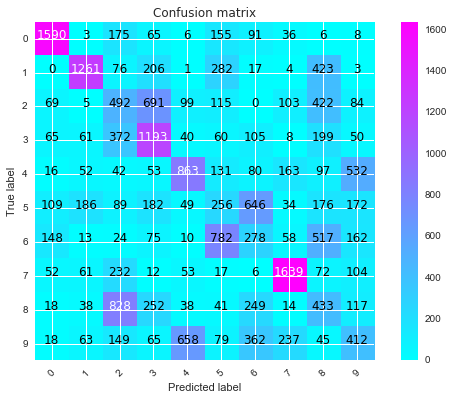

In [32]:
from datetime import datetime as dt
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics as mt
import multiprocessing
sns.set_style("darkgrid", {"axes.facecolor": ".9"})

# http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression

# sklearn.linear_model.LogisticRegressionCV(Cs=10, fit_intercept=True, cv=None, dual=False, 
# penalty='l2', scoring=None, solver='lbfgs', tol=0.0001, max_iter=100, class_weight=None, 
# n_jobs=1, verbose=0, refit=True, intercept_scaling=1.0, multi_class='ovr', random_state=None)

start = dt.now()

skf = StratifiedKFold(n_splits=3, shuffle=False, random_state=None)
# l2 regulariazation only works with 'multinomial' and solvers: ‘newton-cg’, ‘sag’, and ‘lbfgs’
# using 10 fold cross validation

c = LogisticRegressionCV(Cs=10, fit_intercept=True, cv=skf, n_jobs=-1, penalty='l2', 
                              solver='sag', tol=0.00001, class_weight=None, 
                              verbose=0, refit=True, intercept_scaling=1.0, multi_class='multinomial')

# print 'maximum probability', [x for max(x) in prob]
print("Sag Solver...")
print("Fitting Logit...")
c.fit(trainer, y_train)

print("predicting...")
y_hat = c.predict(tester)

print 'Accuracy is', mt.accuracy_score(y_test,y_hat)*100, '%'

print multiprocessing.cpu_count(), 'CPUs Ran in', dt.now() - start, 'minutes' 

conf = mt.confusion_matrix(y_test,y_hat)
plot_confusion_matrix(conf, [x for x in range(10)],
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.cool)

prob = c.predict_proba(tester)
print 'Probabilities', prob
print 'maximum probability', np.max(prob)


# The plot above shows high confusion with the 6's and 0's respecitively.  Also, 7 and 1 have been highly confused.  

lbfgs Solver...
Fitting Logit...
predicting...
Accuracy 40.4 %
CPU Time:  0:00:20.648000
Confusion matrix, without normalization
[[1585    1  163   67    8  169   93   34    7    8]
 [   0 1356   71  199    0  239   15    4  386    3]
 [  65    7  486  705   96  113    0   91  427   90]
 [  60   53  382 1200   36   59  103   10  202   48]
 [  20   44   44   46  859  127   83  181  103  522]
 [ 109  157   89  192   48  266  656   35  168  179]
 [ 144   15   26   83   10  802  257   48  511  171]
 [  56   60  236   13   52   17    7 1635   71  101]
 [  18   40  824  260   35   40  256   14  430  111]
 [  18   50  154   63  640   77  382  251   43  410]]
Probabilities [[  9.77944232e-01   7.40296524e-13   4.33401171e-04 ...,   6.73681258e-06
    2.58848713e-04   1.20166147e-04]
 [  9.41935081e-01   1.10186567e-11   2.61962994e-04 ...,   4.86836134e-02
    6.25368222e-05   4.71839981e-03]
 [  3.47817257e-07   3.39587851e-04   1.48133318e-02 ...,   1.29768898e-01
    6.64338999e-02   1.1065

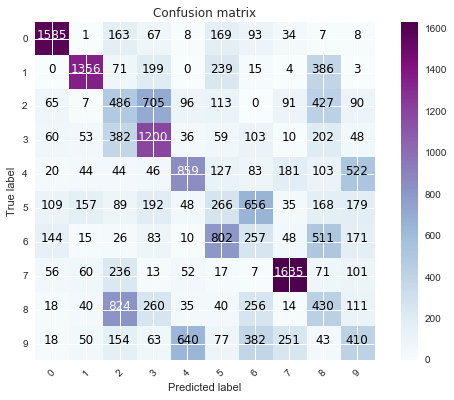

In [33]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
import numpy as np
from sklearn import metrics as mt

# Will try lbfgs
start = dt.now()

# http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression

c = LogisticRegressionCV(solver='lbfgs', cv=skf, penalty='l2',random_state=25,
        multi_class='multinomial', tol=0.00001)


print("lbfgs Solver...")
print("Fitting Logit...")
c.fit(trainer, y_train)

print("predicting...")
y_hat = c.predict(tester)

print 'Accuracy', mt.accuracy_score(y_test,y_hat)*100, '%'

print 'CPU Time: ', dt.now() - start 

conf = mt.confusion_matrix(y_test,y_hat)
plot_confusion_matrix(conf, [x for x in range(10)],
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.BuPu)

prob = c.predict_proba(tester)
print 'Probabilities', prob
print 'maximum probability', np.max(prob)

## 'sag' solver and multinomial class wins at < 50 seconds with 37.00% accuracy and 10 fold cross validation.  The confusion Matrices show 

When the tests above were being performed it was realized that the data was possibly consistent of too many variables, as it took quite some time to perform the log regrssion and other features. With that it was determined that a PCA for dimension reduction would be of great use of tools for this project.

The code below is pulled from a Kaggler, and provides functions for a PCA and logistic regression model that is over 90% accurate.

Now it is time to plot the weights to show where the numbers might lie in determination of which attributes are most important when predicting. As stated presviouly this data set is a little odd in determination of variable selection however we can see that the pixels in the middle of the data set, show to a much greater extent where the possible future values may lie.

Below a pipeline is used to help to a greater extent which values are the largest determinents. A pipline essentially applies a list of transforms along with a final estimator. The final estimator only needs to implement fit. From this we can determine which of the variables is most vital for model creation. As shown in the output the values toward the middle of the pixel scale appear to be the most likely determininents which is to be expected as most of the items would be drawn centered arond the middle of the box.

# Support Vector Machines¶
Scaled attributes from the training and testing data are now used for investigating associated weights and support vectors. This is done by using support vector machines (SVMs) on the data and playing with the parameters.

In [34]:
import numpy as np
from sklearn.model_selection import train_test_split  # We will try the method train_test_split instead of ShuffleSplit

# set X and y, and testing data and normalize by 255.0 pixels
y = train.label.values
X = train.iloc[:,1:].values
test_values = test.values


# try holding out the test set at 50/50
# random state can be changed, but will calibrate with 0
    
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)    
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)  # create x and y training set

print "Done Splitting."


Done Splitting.


In [35]:
from sklearn.decomposition import PCA
n_comp = 50

# whitening was recommended
pca = PCA(n_components=n_comp, whiten=True)

print("Fitting...")
# Set fitted PCA object
trainer = pca.fit_transform(X_train)
tester = pca.fit_transform(X_test)

print("done!")


Fitting...
done!


# Try a 3rd Degree polynomial

Training SVM... Predicting...
Accuracy 40.2238095238 %
CPU Time:  0:10:04.630000
Probabilities [[  3.58036889e-05   1.84246831e-07   1.52268348e-03 ...,   6.74205589e-04
    1.20715704e-01   3.04100350e-02]
 [  8.48314436e-08   1.36376883e-03   8.65985563e-01 ...,   1.78539016e-08
    2.90617366e-03   6.90039699e-07]
 [  8.57403336e-08   5.98208010e-03   7.77246325e-03 ...,   1.61755372e-09
    7.16888644e-02   5.90572824e-07]
 ..., 
 [  3.86746065e-02   7.46031737e-06   7.17989879e-04 ...,   9.37361919e-07
    4.62889247e-02   3.62830001e-05]
 [  3.37246131e-06   8.76000220e-12   2.30431457e-06 ...,   8.18099662e-15
    9.98721732e-01   3.65160752e-07]
 [  5.32166243e-07   9.86777371e-03   6.20964617e-02 ...,   3.59014397e-05
    1.82608066e-02   6.49265081e-03]]
Confusion matrix, without normalization
[[1130    6   36   49   32  419   32  115   11  234]
 [   0 1029    0   17  303    2    2   18   10  974]
 [  13   28 1010   43  300   16   26  173  168  355]
 [   0    3   10  796  155

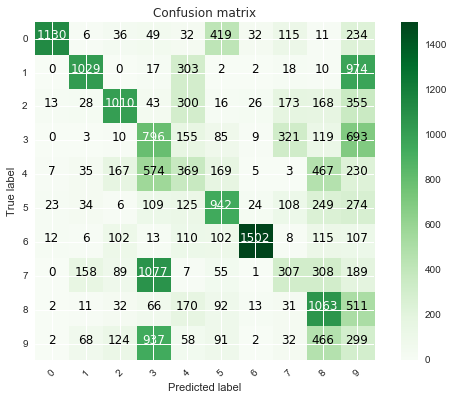

In [36]:
# Reuse X and y from PCA from above
from datetime import datetime as dt

from sklearn.svm import SVC
from sklearn import metrics as mt

# (C=1.0, kernel='rbf', degree=3, gamma='auto', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, 
# class_weight=None, verbose=False, max_iter=-1, decision_function_shape=None, random_state=None)

# adding max_iter or balancing slows things down and hurts accuracy, so leave it at defaults, and


start = dt.now()
s = SVC(C=0.5, kernel='poly', degree=3, probability=True, tol=0.00001)
print("Training SVM..."), 
s.fit(trainer, y_train) 

print("Predicting...") 
y_hat = s.predict(tester) 

print 'Accuracy', mt.accuracy_score(y_test,y_hat)*100, '%'
time = dt.now() - start
print 'CPU Time: ', time


 
conf = mt.confusion_matrix(y_test,y_hat)
prob = c.predict_proba(tester)
print 'Probabilities', prob   
# Compute confusion matrix
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
conf = mt.confusion_matrix(y_test,y_hat)
plot_confusion_matrix(conf, [x for x in range(10)],
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Greens)

# # Plot normalized confusion matrix
# plt.figure()
# plot_confusion_matrix(conf, classes=class_names, normalize=True,
#                       title='Normalized confusion matrix')

plt.show()


# The CM above shows confusion with 7--3, 3--9, 1--9 and particular trouble with 6;  it is possibly overfitting, C and tol could be turned down.  Edge detection is going to be key for classification

Training SVM... Predicting...
Accuracy 34.5619047619 %
CPU Time:  0:04:26.909000
Probabilities [[  3.58e-05   1.84e-07   1.52e-03 ...,   6.74e-04   1.21e-01   3.04e-02]
 [  8.48e-08   1.36e-03   8.66e-01 ...,   1.79e-08   2.91e-03   6.90e-07]
 [  8.57e-08   5.98e-03   7.77e-03 ...,   1.62e-09   7.17e-02   5.91e-07]
 ..., 
 [  3.87e-02   7.46e-06   7.18e-04 ...,   9.37e-07   4.63e-02   3.63e-05]
 [  3.37e-06   8.76e-12   2.30e-06 ...,   8.18e-15   9.99e-01   3.65e-07]
 [  5.32e-07   9.87e-03   6.21e-02 ...,   3.59e-05   1.83e-02   6.49e-03]]
Confusion matrix, without normalization
[[1660    0  119   45    4  142   16   54    3   21]
 [   0   91    9   10  508    2    9  710   27  989]
 [  78    5 1216   30  392   17  150  100   51   93]
 [  47    2   38  567  174   66   43  441  104  709]
 [  20  170  651  473  121  271   59    6  242   13]
 [ 126   15   23  101   66  845  126  158  280  154]
 [ 103    0  180    5  127   58 1586   11    5    2]
 [  18  402  309 1037    8  116    4  185 

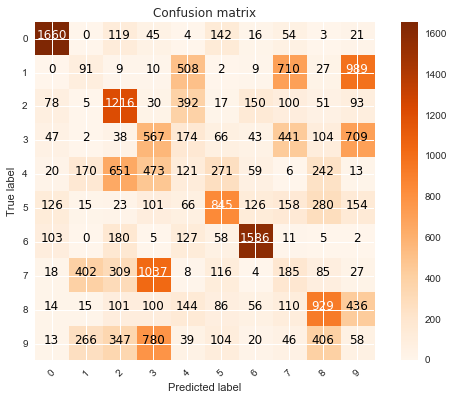

In [37]:
# Linear Kernel with tolerance upped by order of magnitude
start = dt.now()
s = SVC(C=0.5, kernel='linear', probability=True, tol=0.00001)
print("Training SVM..."), 
s.fit(trainer, y_train) 

print("Predicting...") 
y_hat = s.predict(tester) 

print 'Accuracy', mt.accuracy_score(y_test,y_hat)*100, '%'

print 'CPU Time: ', dt.now() - start

conf = mt.confusion_matrix(y_test,y_hat)
prob = c.predict_proba(tester)
print 'Probabilities', prob 

conf = mt.confusion_matrix(y_test,y_hat)
plot_confusion_matrix(conf, [x for x in range(10)],
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Oranges)


## simillar issues 7--3, 3--9, 9--1 are having trouble, but more sparse than polynomial.  Less fitting and sensitivity as tol and C went down.  

Training SVM... Predicting...
Accuracy 44.8428571429 %
CPU Time:  0:07:32.082000
Probabilities [[  3.58e-05   1.84e-07   1.52e-03 ...,   6.74e-04   1.21e-01   3.04e-02]
 [  8.48e-08   1.36e-03   8.66e-01 ...,   1.79e-08   2.91e-03   6.90e-07]
 [  8.57e-08   5.98e-03   7.77e-03 ...,   1.62e-09   7.17e-02   5.91e-07]
 ..., 
 [  3.87e-02   7.46e-06   7.18e-04 ...,   9.37e-07   4.63e-02   3.63e-05]
 [  3.37e-06   8.76e-12   2.30e-06 ...,   8.18e-15   9.99e-01   3.65e-07]
 [  5.32e-07   9.87e-03   6.21e-02 ...,   3.59e-05   1.83e-02   6.49e-03]]
Confusion matrix, without normalization
[[1622    0   68   40    9  262   21   11    7   24]
 [   0  932    4   32  458    3    7  291   13  615]
 [  25    3 1447   18  210   12   99   92  139   87]
 [  24    0   55  784  213  126   27  341  126  495]
 [   7   27  532  472  269  204   24    1  455   35]
 [  84    2   34  110   52 1080   64   80  285  103]
 [  45    0  102    6   33   76 1781   12   19    3]
 [  25  124  383 1184   12   44    1  190 

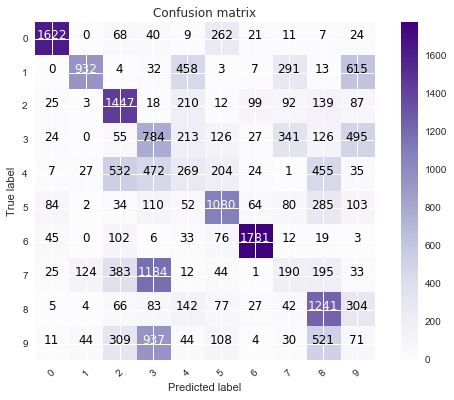

In [38]:
# rbf kernel 
start = dt.now()
s = SVC(C=0.5, kernel='rbf', probability=True, tol=0.00001)
print("Training SVM..."), 
s.fit(trainer, y_train) 

print("Predicting...") 
y_hat = s.predict(tester) 
print 'Accuracy', mt.accuracy_score(y_test,y_hat)*100, '%'

print 'CPU Time: ', dt.now() - start

conf = mt.confusion_matrix(y_test,y_hat)
prob = c.predict_proba(tester)
print 'Probabilities', prob 
conf = mt.confusion_matrix(y_test,y_hat)
plot_confusion_matrix(conf, [x for x in range(10)],
                      normalize=False,
                      title='Confusion matrix',
                      cmap=plt.cm.Purples)



Training SVM... Predicting...
Accuracy 37.5952380952 %
CPU Time:  0:01:27.832000
Probabilities [[  3.58e-05   1.84e-07   1.52e-03 ...,   6.74e-04   1.21e-01   3.04e-02]
 [  8.48e-08   1.36e-03   8.66e-01 ...,   1.79e-08   2.91e-03   6.90e-07]
 [  8.57e-08   5.98e-03   7.77e-03 ...,   1.62e-09   7.17e-02   5.91e-07]
 ..., 
 [  3.87e-02   7.46e-06   7.18e-04 ...,   9.37e-07   4.63e-02   3.63e-05]
 [  3.37e-06   8.76e-12   2.30e-06 ...,   8.18e-15   9.99e-01   3.65e-07]
 [  5.32e-07   9.87e-03   6.21e-02 ...,   3.59e-05   1.83e-02   6.49e-03]]
Confusion matrix, without normalization
[[1650    0   79   56    7  121   21   74    3   53]
 [   0  707   10    8  415    5   12  546    4  648]
 [  71   15 1079   26  345   16  243  141   55  141]
 [  31   22   45  540  255   61   60  518  113  546]
 [  30  195  564  394  184  302   73    4  260   20]
 [ 108  106   35  100   69  875  119  150  252   80]
 [  94    7  137    2   45   72 1668   23    3   26]
 [  46  347  401  947   10   98    1  175 

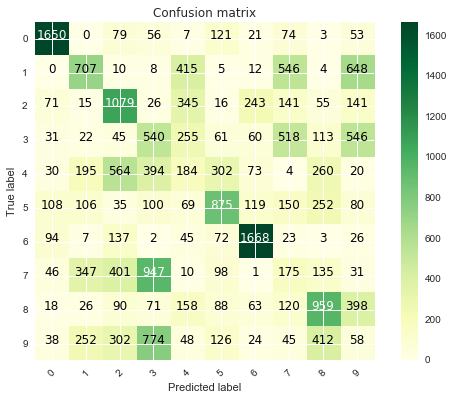

In [39]:
# sigmoid kernel 
start = dt.now()
s = SVC(C=0.5, kernel='sigmoid', probability=True, tol=0.00001)
print("Training SVM..."), 
s.fit(trainer, y_train) 

print("Predicting...") 
y_hat = s.predict(tester) 
print 'Accuracy', mt.accuracy_score(y_test,y_hat)*100, '%'

print 'CPU Time: ', dt.now() - start

conf = mt.confusion_matrix(y_test,y_hat)
prob = c.predict_proba(tester)
print 'Probabilities', prob 
conf = mt.confusion_matrix(y_test,y_hat)
plot_confusion_matrix(conf, [x for x in range(10)],
                      normalize=False,
                      title='Confusion matrix',
                      cmap=plt.cm.YlGn)

# Not much difference with normalization, but as you can see, SVM with the 'rbf' solver outperforms the other solvers, and the logit in this arena due to multidimensional flexibility.


## SGB Stochastic Gradient
With the above SVM it is not necessarily easy to see the distributions of the values with the weights. To understand that we must perform a Stochastic Gradient Classifier to help decide where the ideal weight is in regard to keeping a rendom sample. From the graphical output we can see that a weight of 1.5 is much more idel for attaining a random sample across the entire data source than 0.5. 

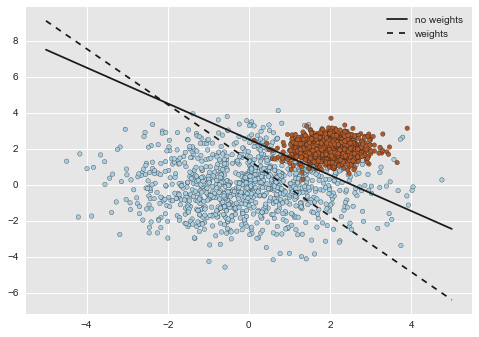

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.linear_model.stochastic_gradient import SGDClassifier
#from sklearn.linear_model import SGDClassifier

# we create 1000 Random points of Sample 1 and 2 respectively
rng = np.random.RandomState(0)
n_samples_1 = 1000
n_samples_2 = 1000

#We will try two seperate weights for the data set as shown below. From the graph we can see that the 
X = np.r_[1.5 * rng.randn(n_samples_1, 2),
          .5* rng.randn(n_samples_2, 2) + (2,2)]
y = [0] * (n_samples_1) + [1] * (n_samples_2)
# fit the model
clf = SGDClassifier(n_iter=100, alpha=0.01)
clf.fit(X, y)

w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-5, 5)
yy = a * xx - clf.intercept_[0] / w[1]


# get the separating hyperplane using weighted classes
wclf = svm.SVC(kernel='linear', class_weight={1: 1000})
wclf.fit(X, y)

ww = wclf.coef_[0]
wa = -ww[0] / ww[1]
wyy = wa * xx - wclf.intercept_[0] / ww[1]

# plot separating hyperplanes and samples
h0 = plt.plot(xx, yy, 'k-', label='no weights')
h1 = plt.plot(xx, wyy, 'k--', label='weights')
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.legend()

plt.axis('tight')
plt.show()

Probabilities [[  3.58e-05   1.84e-07   1.52e-03 ...,   6.74e-04   1.21e-01   3.04e-02]
 [  8.48e-08   1.36e-03   8.66e-01 ...,   1.79e-08   2.91e-03   6.90e-07]
 [  8.57e-08   5.98e-03   7.77e-03 ...,   1.62e-09   7.17e-02   5.91e-07]
 ..., 
 [  3.87e-02   7.46e-06   7.18e-04 ...,   9.37e-07   4.63e-02   3.63e-05]
 [  3.37e-06   8.76e-12   2.30e-06 ...,   8.18e-15   9.99e-01   3.65e-07]
 [  5.32e-07   9.87e-03   6.21e-02 ...,   3.59e-05   1.83e-02   6.49e-03]]
Confusion matrix, without normalization
[[1650    0   79   56    7  121   21   74    3   53]
 [   0  707   10    8  415    5   12  546    4  648]
 [  71   15 1079   26  345   16  243  141   55  141]
 [  31   22   45  540  255   61   60  518  113  546]
 [  30  195  564  394  184  302   73    4  260   20]
 [ 108  106   35  100   69  875  119  150  252   80]
 [  94    7  137    2   45   72 1668   23    3   26]
 [  46  347  401  947   10   98    1  175  135   31]
 [  18   26   90   71  158   88   63  120  959  398]
 [  38  252  302 

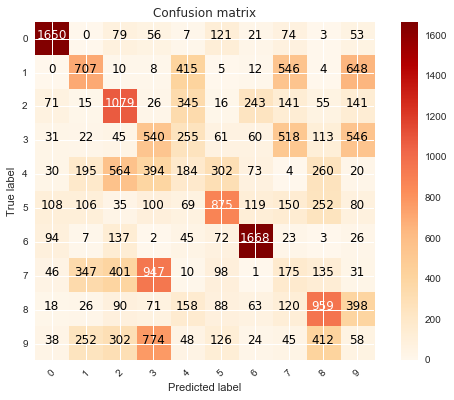

In [41]:
print 'Probabilities', prob 
conf = mt.confusion_matrix(y_test,y_hat)
plot_confusion_matrix(conf, [x for x in range(10)],
                      normalize=False,
                      title='Confusion matrix',
                      cmap=plt.cm.OrRd)

# Random Forest BenchMark


In [42]:
# Code taken from https://www.kaggle.com/c/digit-recognizer/forums/t/2299/getting-started-python-sample-code-random-forest

from sklearn.ensemble import RandomForestClassifier
from numpy import genfromtxt, savetxt

def main():
    #create the training & test sets, skipping the header row with [1:]
    dataset = genfromtxt(open('data/train.csv','r'), delimiter=',', dtype='f8')[1:]    
    target = [x[0] for x in dataset]
    train = [x[1:] for x in dataset]
    test = genfromtxt(open('data/test.csv','r'), delimiter=',', dtype='f8')[1:]
    
    #create and train the random forest
    #multi-core CPUs can use: rf = RandomForestClassifier(n_estimators=100, n_jobs=2)
    rf = RandomForestClassifier(n_estimators=100)
    rf.fit(train, target)

    savetxt('data/submission2.csv', rf.predict(test), delimiter=',', fmt='%f')

if __name__=="__main__":
    main()

# warm start along the path i.e guess the initial coefficients of the present fit to be the coefficients got after convergence in the previous fit, so it is supposed to be faster for high-dimensional dense data.